# Compute Statistics from Card Draws

This experiment will require the use of a standard deck of playing cards. This is a deck of fifty-two cards divided into four suits (spades (♠), hearts (♥), diamonds (♦), and clubs (♣)), each suit containing thirteen cards (Ace, numbers 2-10, and face cards Jack, Queen, and King).You can use either a physical deck of cards for this experiment or you may use our data generator in the Generate Data section, or you may use a virtual deck of cards such as that found on random.org (http://www.random.org/playing-cards/). For the purposes of this task, assign each card a value: The Ace takes a value of 1, numbered cards take the value printed on the card, and the Jack, Queen, and King each take a value of 10.
1. First, create a histogram depicting the relative frequencies of the card values for a single draw. Report the mean, median, and standard deviation of the value distribution. (You should have performed this step in the Distribution of Card Values section.)
2. Take a look at the distribution of the three-card sums from the samples that you obtained, either from Generate Data, or from your own collection. Report descriptive statistics for the samples you have drawn. Include at least two measures of central tendency and two measures of variability.
3. Create a histogram of the sampled three-card sums. Compare its shape to that of the original distribution. How are they different, and can you explain why this is the case?
4. Make some estimates about values you would get on future draws. Within what range will you expect approximately 90% of your draw values to fall? What is the approximate probability that you will get a draw value of at least 20? Make sure you justify how you obtained your values.

In [59]:
# Load Libraries
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [60]:
# Create Cards Deck
# Hearts-H, Spades-S, Clubs-C, Diamonds-D
suits = ['H', 'S', 'C', 'D']
card_vals = (range(1, 11) + [10] * 3) * 4
base_names = ['A'] + range(2, 11) + ['J', 'K', 'Q'] 
cards = []
for suit in suits:
    cards.extend(str(num) + suit for num in base_names)
deck = pd.Series(card_vals, index=cards)
deck

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
AS      1
2S      2
3S      3
4S      4
5S      5
6S      6
7S      7
8S      8
9S      9
10S    10
JS     10
KS     10
QS     10
AC      1
2C      2
3C      3
4C      4
5C      5
6C      6
7C      7
8C      8
9C      9
10C    10
JC     10
KC     10
QC     10
AD      1
2D      2
3D      3
4D      4
5D      5
6D      6
7D      7
8D      8
9D      9
10D    10
JD     10
KD     10
QD     10
dtype: int64

In [61]:
deck.describe()

count    52.000000
mean      6.538462
std       3.183669
min       1.000000
25%       4.000000
50%       7.000000
75%      10.000000
max      10.000000
dtype: float64

### 1. Create a histogram depicting the relative frequencies of the card values for a single draw

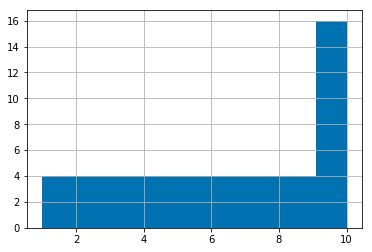

In [62]:
deck.hist()

### 2. Descriptive statistics for new samples

In [63]:
samples = []
for i in range(1000):
    samples.append(np.random.choice(deck,3, replace=False).sum())
samples = pd.Series(samples)
#samples

In [64]:
samples.describe()

count    1000.000000
mean       19.590000
std         5.357294
min         3.000000
25%        16.000000
50%        20.000000
75%        23.000000
max        30.000000
dtype: float64

### 3. Create a histogram of the sampled card sums you have recorded
Create a histogram of the sampled card sums you have recorded. Compare its shape to that of the original distribution. How are they different, and can you explain why this is the case?

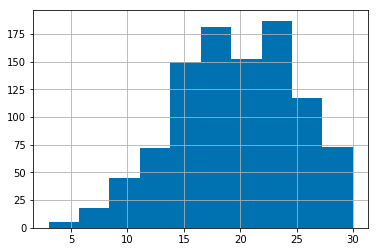

In [65]:
samples.hist()

### 4. Make some estimates about values you will get on future draws
Make some estimates about values you will get on future draws. Within what range will you expect approximately 90% of your draw values to fall? What is the approximate probability that you will get a draw value of at least 20? Make sure you justify how you obtained your values.

#### a. Within what range will you expect approximately 90% of your draw values to fall?

In [70]:
samples.quantile(q=[.05,.90])

0.05    10.95
0.90    27.00
dtype: float64

#### b. Approximate probability that you will get a draw value of at least 20?
Calculate the z score as $Z=$X−$μ/$σ



In [68]:
z = (20-samples.mean())/samples.std()
z

0.07653117200302566

Instead of looking in the Z score table lets calculate the probability from Z score.
Convert the Z score to a p-value with the Survival function (also defined as 1 - cdf (Cumulative Distribution Function), but sf is sometimes more accurate).

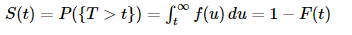

In [69]:
sf = stats.norm.sf(z)
sf

0.46949825750882851

Thus the probability that we will get a draw value of at least 20 is 0.4694